In [17]:
import pandas as pd

# Veri setini yükleme
df = pd.read_csv('/content/sample_data/insurance.csv')

# İlk 5 satırı görüntüleme
print(df.head())

# Veri seti hakkında bilgi alma
print(df.info())

# Betimsel istatistikler
print(df.describe())

# Eksik verileri kontrol etme
print(df.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [18]:
# Kategorik değişkenleri One-Hot Encoding ile dönüştürme
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [3]:
# Standartlaştırma
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df['age'] = scaler.fit_transform(df[['age']])
#df['bmi'] = scaler.fit_transform(df[['bmi']])
#df['children'] = scaler.fit_transform(df[['children']])
#df['charges'] = scaler.fit_transform(df[['charges']])

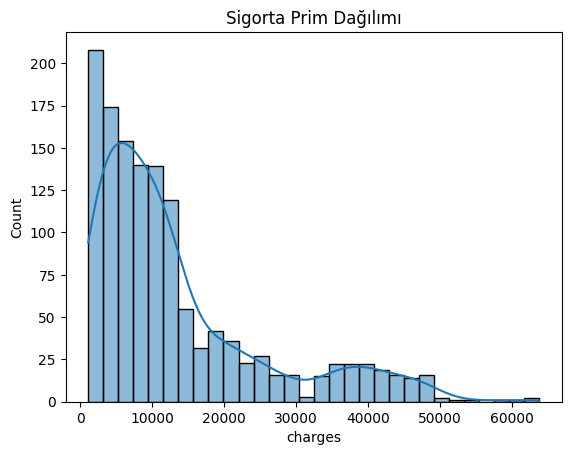

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sigorta primi dağılımı [Histogram]
sns.histplot(df['charges'], kde=True)
plt.title('Sigorta Prim Dağılımı')
plt.show()

In [ ]:
# yukarıda gördüğümüz hedef değişkenimzin grafiğinden yola çıkarak, grafiğimizin sağa yatık bir grafik olduğunu söyleyebiliriz.
# aynı zamanda genellikle -1 ile 0 aralığında toplanmış olsalarda yüksek değerlerimizin de mevcut olduğunu görmekteyiz.

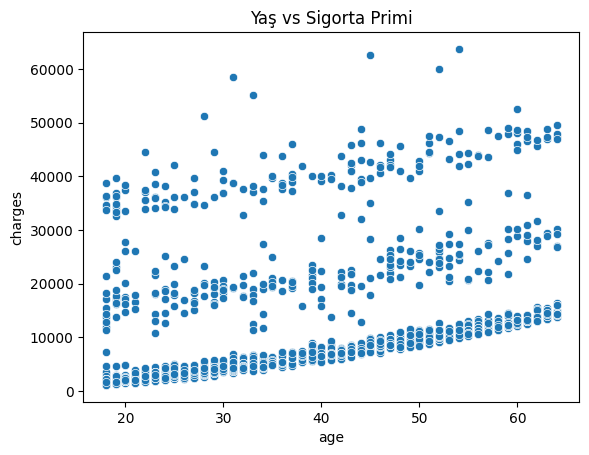

In [ ]:
# Yaş ve sigorta primi ilişkisi [Scatterplot]
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Yaş vs Sigorta Primi')
plt.show()

In [ ]:
# Yaş ilerledikçe priminde bu yönde pozitif korelasyon gösterdiğini görüyoruz.
# Aykırı değerlerimizde bulunmaktadır.

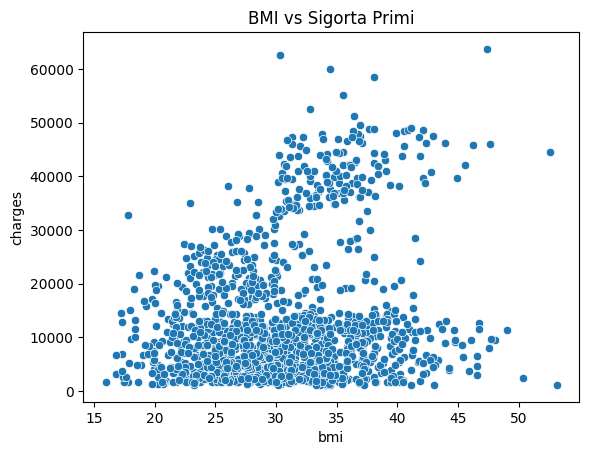

In [ ]:
# BMI ve sigorta primi ilişkisi [Scatterplot]
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Sigorta Primi')
plt.show()


In [ ]:
# BMI ile sigorta primi arasında pozitif korelasyon ilişkisi bulunmaktadır.
# Aykırı değerler yine göze çarpıyor, eğer bunları işlemezsek tahmin aşamasında doğruluğumuzu kötü şekilde etkileyebilir.

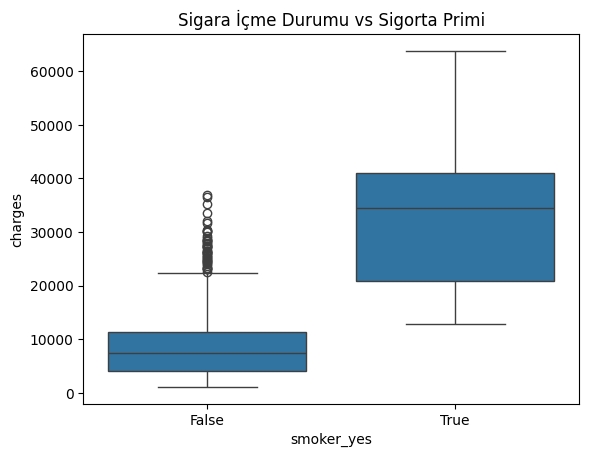

In [ ]:
# Sigara içme durumu ve sigorta primi ilişkisi [Boxplot]
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title('Sigara İçme Durumu vs Sigorta Primi')
plt.show()

In [ ]:
#Grafikte açıkça görüldüğü gibi sigara içenler oldukça fazla primler ile karşılaşıyor.
#İçmeyenler kutusunda gördüğümüz aykırı değerlerin sebebi BMI veya age değişkeninden kaynaklanıyor olabilir.

<Axes: >

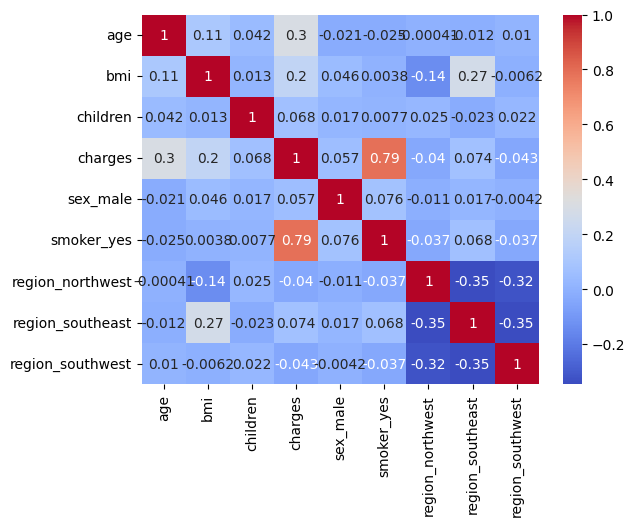

In [ ]:
# korelasyon matrisimizde değişkenlerimizi inceleyelim
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
# hedef değişkenimizi en çok etkileyen özellikler : smoker, age, bmi dır.
# birbiri ile yüksek korelasyon gösteren veya hedef değişken ile çok çok düşük bağı olup çıkartmamızı gerektirecek özelliğimiz bulunmamaktadır.

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [20]:
# Yaş kategorileri oluşturma
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 100], labels=['çocuk', 'genç', 'orta yaş', 'yaşlı'])

# BMI kategorileri oluşturma
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['zayıf', 'normal', 'fazla kilolu', 'obez'])

# Kategorik değişkenleri One-Hot Encoding ile dönüştürme
df = pd.get_dummies(df, columns=['age_category', 'bmi_category'], drop_first=True)

# Yeni değişkenler oluşturma
# Etkileşim terimleri ekleme
df['age_bmi'] = df['age'] * df['bmi']
df['smoker_bmi'] = df['smoker_yes'] * df['bmi']

# Dönüştürülmüş veriyi görüntüleme
display(df.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_category_genç,age_category_orta yaş,age_category_yaşlı,bmi_category_normal,bmi_category_fazla kilolu,bmi_category_obez,age_bmi,smoker_bmi
0,19,27.900,0,16884.92400,False,True,False,False,True,True,False,False,False,True,False,530.100,27.9
1,18,33.770,1,1725.55230,True,False,False,True,False,False,False,False,False,False,True,607.860,0.0
2,28,33.000,3,4449.46200,True,False,False,True,False,True,False,False,False,False,True,924.000,0.0
3,33,22.705,0,21984.47061,True,False,True,False,False,True,False,False,True,False,False,749.265,0.0
4,32,28.880,0,3866.85520,True,False,True,False,False,True,False,False,False,True,False,924.160,0.0


In [ ]:
# age özelliğimizi kategorileri ile ayrı ayrı kolonlara atadık ve tahmin etme aşamasında bize yardımcı olacaktır. aynı işlemi bmi içinde gerçekleştirdik
# sonrasında bu özelliklerimizi one hot ile encode ettik
# age ile bmi ın çarpılması ile daha güçlü olacağını düşündüğümüz age_bmi özelliği türettik, yine aynı şekilde smoker_bmi özelliğini ekledik

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Özellikler ve hedef değişken
X = df.drop('charges', axis=1)
y = df['charges']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# RMSE Hesaplama
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

# Metrikler
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)

print("Lineer Regresyon R²:", r2_lr)
print("Lineer Regresyon RMSE:", calculate_rmse(y_test, y_pred_lr))

Lineer Regresyon R²: 0.86837714267488
Lineer Regresyon RMSE: 4520.429364014836


In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_category_genç,age_category_orta yaş,age_category_yaşlı,bmi_category_normal,bmi_category_fazla kilolu,bmi_category_obez,age_bmi,smoker_bmi,log_charges
0,-1.438764,-0.453320,-0.908614,0.298584,False,True,False,False,True,True,False,False,False,True,False,-1.304476,1.699463,-1.208705
1,-1.509965,0.509621,-0.078767,-0.953689,True,False,False,True,False,False,False,False,False,False,True,-1.155629,-0.494516,NaN
2,-0.797954,0.383307,1.580926,-0.728675,True,False,False,True,False,True,False,False,False,False,True,-0.550476,-0.494516,NaN
3,-0.441948,-1.305531,-0.908614,0.719843,True,False,True,False,False,True,False,False,True,False,False,-0.884952,-0.494516,-0.328722
4,-0.513149,-0.292556,-0.908614,-0.776802,True,False,True,False,False,True,False,False,False,True,False,-0.550170,-0.494516,NaN


In [22]:
# şimdi tekrardan lineer regresyon modelimizi, veri setimizin bu hali ile eğitelim ve test edelim.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Özellikler ve hedef değişken
X = df.drop('charges', axis=1)
y = df['charges']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# RMSE Hesaplama
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

# Metrikler
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)

print("Lineer Regresyon R²:", r2_lr)
print("Lineer Regresyon RMSE:", calculate_rmse(y_test, y_pred_lr))

Lineer Regresyon R²: 0.86837714267488
Lineer Regresyon RMSE: 4520.429364014836


In [ ]:
#bu işlemlerimizin ardından r2 değerimizde 0.01 lik artış ve RMSE hata değerimizde 0,92 lik bir düşüş kazancı elde ettik

In [23]:
#şimdi polinomsal özellik ekleyerek modelimizin daha iyi tahminler yapmasını amaçlıyoruz
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# En iyi polinom derecesini belirlemek için
mse_scores = {}
r2_scores = {}

for degree in range(1, 6):  # 1'den 5'e kadar deneyelim
    # Polinomsal özellikler oluştur
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Lineer Regresyon Modeli
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test_poly)

    # Hata hesapları
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores[degree] = mse
    r2_scores[degree] = r2

    print(f"Degree: {degree} -> MSE: {mse:.4f}, R²: {r2:.4f}")

# En düşük MSE'yi bulan en iyi dereceyi seçelim
best_degree = min(mse_scores, key=mse_scores.get)
print(f"\nEn iyi polinom derecesi: {best_degree}, En düşük MSE: {mse_scores[best_degree]:.4f}")


Degree: 1 -> MSE: 20434281.6350, R²: 0.8684
Degree: 2 -> MSE: 20973967.5966, R²: 0.8649
Degree: 3 -> MSE: 111108987.6648, R²: 0.2843
Degree: 4 -> MSE: 248786684.1214, R²: -0.6025
Degree: 5 -> MSE: 51796516.6812, R²: 0.6664

En iyi polinom derecesi: 1, En düşük MSE: 20434281.6350


In [ ]:
#sonuçlarımızda da açıkça gözüktüğü gibi en iyi polinom derecemiz 2 dir.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Polinomsal özellikler oluşturma (2. dereceden)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Polinomsal özelliklerle yeni bir dataframe oluşturma
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Eğitim ve test setlerine ayırma
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

In [25]:
# ridge ve lasso modelleri eğiterek daha iyi tahmin yapıp yapmadığını inceleyelim

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np



# Ridge Regresyon
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regresyon
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# RMSE Hesaplama
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

# Metrikler
from sklearn.metrics import r2_score

r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regresyon R²:", r2_ridge)
print("Ridge Regresyon RMSE:", calculate_rmse(y_test, y_pred_ridge))

print("Lasso Regresyon R²:", r2_lasso)
print("Lasso Regresyon RMSE:", calculate_rmse(y_test, y_pred_lasso))

Ridge Regresyon R²: 0.8691418181228935
Ridge Regresyon RMSE: 4507.279305938402
Lasso Regresyon R²: 0.8685494302842284
Lasso Regresyon RMSE: 4517.469889467387


In [ ]:
# yukarıda ki sonuçlara baktığımız zaman lineere göre daha iyi sonuçlar göremiyoruz
# lasso baya saçmalamış durumda bu durumun en iyi alpha değerinin belirlenmesi ile çözüleceğini umuyorum.

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ridge modeli
ridge = Ridge()

# Alpha değerlerini belirleme (örneğin, 0.001'den 100'e kadar)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV ile en iyi alpha değerini bulma
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# En iyi alpha değerini ve MSE'yi yazdırma
best_alpha_ridge = ridge_grid.best_params_['alpha']
print("Ridge için en iyi alpha değeri:", best_alpha_ridge)

# En iyi modelle tahmin yapma
y_pred_ridge = ridge_grid.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regresyon - MSE:", mse_ridge)
print("Ridge Regresyon - R²:", r2_ridge)

# Lasso modeli
lasso = Lasso()

# Alpha değerlerini belirleme (örneğin, 0.001'den 100'e kadar)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV ile en iyi alpha değerini bulma
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# En iyi alpha değerini ve MSE'yi yazdırma
best_alpha_lasso = lasso_grid.best_params_['alpha']
print("Lasso için en iyi alpha değeri:", best_alpha_lasso)

# En iyi modelle tahmin yapma
y_pred_lasso = lasso_grid.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regresyon - MSE:", mse_lasso)
print("Lasso Regresyon - R²:", r2_lasso)

Ridge için en iyi alpha değeri: 0.1
Ridge Regresyon - MSE: 20414784.802793343
Ridge Regresyon - R²: 0.8685027271615736
Lasso için en iyi alpha değeri: 10
Lasso Regresyon - MSE: 20313258.833349332
Lasso Regresyon - R²: 0.8691566839988917


In [ ]:
# evet burada iyi sonuçlar aldığımızı görüyoruz ancak lineer regresyon modelimize göre artış çok çok az sağlansada daha iyi bir model eğitmeyi başardık .

In [27]:
import joblib
import pickle

# Veri ön işleme sonrası dataframe'i kaydetme
with open('processed_insurance_data.pkl', 'wb') as f:
    pickle.dump(df, f)

# Modeli kaydetme (örneğin Lineer Regresyon)
joblib.dump(lasso, 'lasso_regression_model_insurance.joblib')

['lasso_regression_model_insurance.joblib']